# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data from csv file.
customer_df = pd.read_csv('/Users/pauli/Desktop/Ironhack/Week10/Jueves_29.09.2022/lab-feature-extraction/we_fn_use_c_marketing_customer_value_analysis.csv')
# Setting the display options.
pd.set_option('display.max_columns', None)
# Preview the dataset.
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Drop redundant columns from the dataset which does not have any predictive power. 
# In this case, Customer is the redundant column. So, I will drop it first.
customer_df.drop('Customer', axis=1, inplace=True)

In [4]:
# Rename the columns so they follow the PE8 (snake case).
customer_df.columns = customer_df.columns.str.lower().str.replace(" ","_")
customer_df.rename(columns = {"employmentstatus" : "employment_status"}, inplace = True)
customer_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
# Changing effective_to_date column to datetime format.
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)
customer_df.effective_to_date.head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

### 1. Get the numerical variables from our dataset.

In [6]:
df_numericals = customer_df.select_dtypes(np.number)
df_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [7]:
df_numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

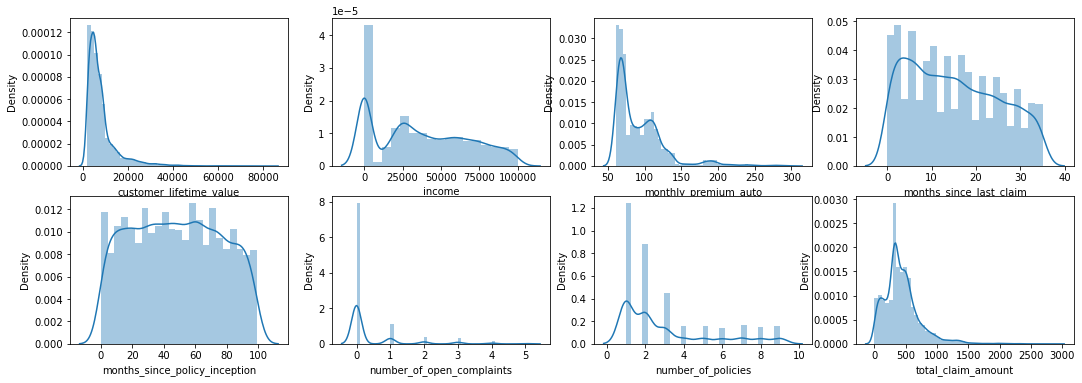

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(18, 6))
count = 0
for col in df_numericals.columns:
    if count in range(0, 4):
        sns.distplot(df_numericals[col], ax=ax[0, count])
    else:
        sns.distplot(df_numericals[col], ax=ax[1, count-4])
    count += 1
plt.show()

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

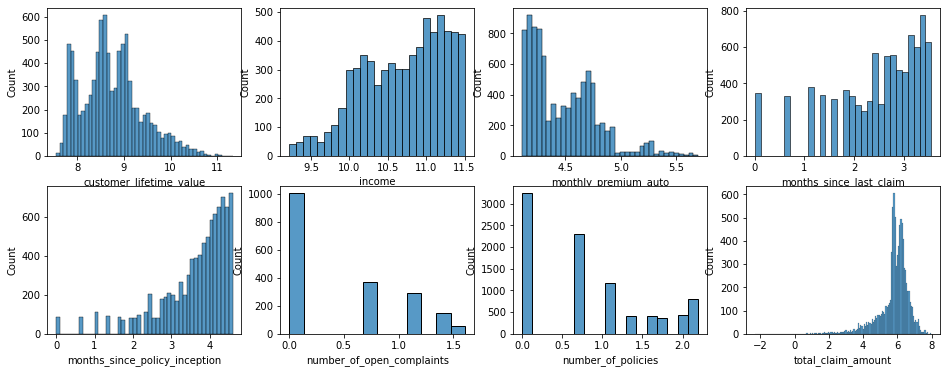

In [9]:
# Change exponential to linear distributions
for col in df_numericals:
    df_numericals[col] = np.log(df_numericals[col])

fig, ax = plt.subplots(2, 4, figsize=(16, 6))
count = 0
for col in df_numericals.columns:
    if count in range(0, 4):
        sns.histplot(df_numericals[col], ax=ax[0, count])
    else:
        sns.histplot(df_numericals[col], ax=ax[1, count-4])
    count += 1
plt.show()